In [13]:
from mmengine import Config
import torch
from matplotlib import pyplot as plt
import numpy as np
import os
import torchvision
from vae import VAE

In [14]:
ckp_root = '07-12-24/19:40:46-[vae]-[reg-w-0.075]'
config = Config.fromfile(os.path.join(ckp_root, 'config.py'))
ckp = torch.load(os.path.join(ckp_root, 'last.ckpt'), map_location='cpu')

model = VAE(**config.model_config)
sd = ckp['state_dict'] 
sd = {k[6:]: v for k, v in sd.items()}
model.load_state_dict(sd)

<All keys matched successfully>

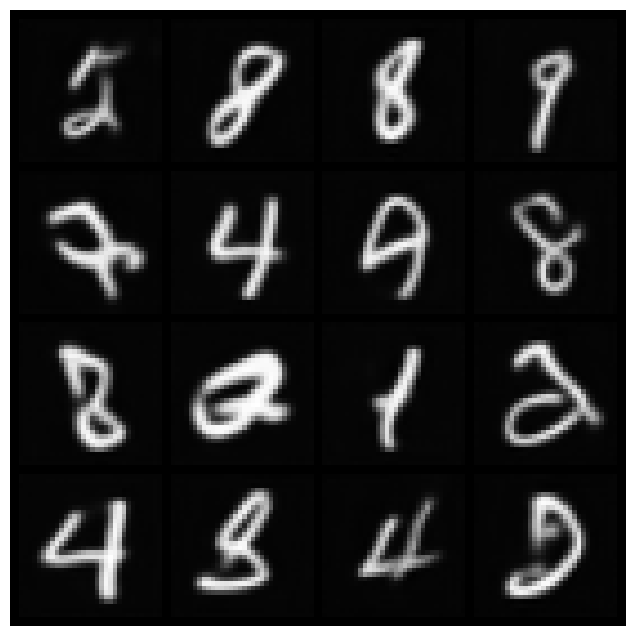

: 

In [15]:
out = model.sample_img(16, device='cpu')
img = torchvision.utils.make_grid(out, nrow=4, normalize=True)
fig = plt.figure(figsize=(8, 8))
plt.imshow(img.permute(1, 2, 0).numpy())
plt.axis('off')
plt.show()